# Polynomial regression 

The example belows uses a temperature-energy dataset in order to illustrate how to perform a non linear regression.

Workflow:
1. Preparation
    - Extract the dataset from the _power_demand_vs_temperature.csv_ 
    - Explore the dataset and check for missing values
    - Plot the distribution
    - Divide the dataset into train and test 
    - Create an evaluation function
2. First experiment
    - Create a linear model 
    - Train the model on X_train and y_train
    - Evaluate the model on X_test and y_test
    - Visualize the prediction of the model
3. Second experiment
    - Create a polynomial regression model with degree 2
    - Train the model on X_train and y_train
    - Evaluate the model on X_test and y_test
    - Visualize the prediction of the model
4. Third experiment
    - repeat the steps done in the second experiment but with degree 3
5. Third experiment
    - repeat the steps done in the second experiment but with degree 4
6. Compare the evaluation of each model


In [23]:
# Code source: Filippo Orazi 
# License: BSD 3 clause

import matplotlib.pyplot as plt
import numpy as np
import scipy.stats
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import f_regression


random_state = 42 # this will be used to guarantee the repeatability of the experiment

## Dataset preparation

### Load the dataset from a `.csv` file

The file must be available in the same directory, or uploaded in the Colab environment in the execution of the previous cell


In [4]:
df = pd.read_csv('power_demand_vs_temperature.csv')
df.head()

,date,demand,temp
0,2015-01-01,1.736065,1.7
1,2015-01-02,1.831672,2.2
2,2015-01-03,1.714934,14.4
3,2015-01-04,1.628577,15.6
4,2015-01-05,2.045394,0.0


Set the date column as index

In [5]:
df.set_index('date')

,demand,temp
date,,
2015-01-01,1.736065,1.7
2015-01-02,1.831672,2.2
2015-01-03,1.714934,14.4
2015-01-04,1.628577,15.6
2015-01-05,2.045394,0.0
...,...,...
2017-12-27,1.983683,-9.4
2017-12-28,2.001531,-10.0
2017-12-29,1.940514,-7.8


### Explore the dataset and check for missing values


In [6]:
df.describe()

,demand,temp
count,1096.000000,1096.000000
mean,1.831796,16.927737
std,0.329434,10.791581
min,1.316033,-15.000000
25%,1.581654,8.900000
50%,1.731479,18.900000
75%,2.024869,26.100000
max,2.804025,33.900000


In [11]:
print(f"The dataframe has {len(df) - len(df.dropna())} invalid rows")

The dataframe has 0 invalid rows


### Create X and y 

In [15]:
X = df[['temp']]
y = df['demand']

print(f'X has shape {X.shape}\ny has shape {y.shape}')

X has shape (1096, 1)
y has shape (1096,)


### Plot the distribution



[]

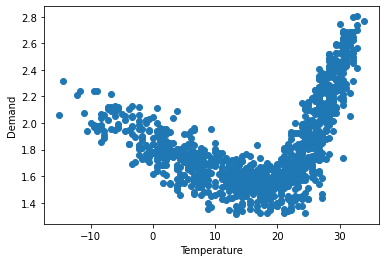

In [18]:
plt.scatter(X, y);
plt.xlabel('Temperature')
plt.ylabel('Demand')
plt.plot()

### Divide the dataset in train and test splits

In [22]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=random_state)
print(f"Training set and test set have {len(ytrain)} and {len(ytest)} elements respectively")

Training set and test set have 767 and 329 elements respectively


### Create an evaluation function to compute, print and return the metrics: rmse r2 f-statistic and p-value

In [24]:
# Computation of F-statistic and p-value for the regression
# http://facweb.cs.depaul.edu/sjost/csc423/documents/f-test-reg.htm
def evaluate(ytrue, ypred):
    indices = ['rmse', 'r2', 'f-statistic', 'p-value']
    values = []
    values.append(mean_squared_error(ytrue, ypred, squared=False))
    values.append(r2_score(ytrue, ypred))
    f, p = f_regression(ypred.reshape(-1, 1), ytrue)
    values.extend([f[0], p[0]])

    data = {'Value': values}
    return pd.DataFrame(data=data, index=indices)

## First experiment
Create a linear model 

Train the model on X_train and y_train 

Evaluate the model on X_test and y_test


In [48]:
def train_and_eval(Xtrain, Xtest, ytrain, ytest, degree=1):
    if degree > 1:
        Xtrain = PolynomialFeatures(degree).fit_transform(Xtrain)
        Xtest = PolynomialFeatures(degree).fit_transform(Xtest)
    reg = LinearRegression().fit(Xtrain, ytrain)
    ypred = reg.predict(Xtest)
    results = evaluate(ytest, ypred)

    plt.scatter(X, y)
    plt.xlabel('Temperature')
    plt.ylabel('Demand')

    z = np.linspace(min(X['temp']), max(X['temp']), 1000)
    if degree > 1:
        z_df = PolynomialFeatures(degree).fit_transform(z.reshape(-1, 1))
    else:
        z_df = pd.DataFrame(data={'temp': z})
    plt.plot(z, reg.predict(z_df), color='red')
    plt.show()
    return results

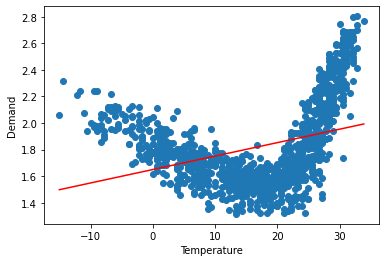

,Value
rmse,3.188273e-01
r2,1.680903e-01
f-statistic,7.732269e+01
p-value,8.445803e-17


In [55]:
results1 = train_and_eval(Xtrain, Xtest, ytrain, ytest)
results1

#### Visualize the prediction of the model 

## Second experiment - Polynomial regression
We can clearly see that the linear regression model cannot really approximate the data distribution.

We can now try with a non linear regression model:
1. Use the sklearn fucntion _PolynomialFeature_ to create a new array of features. Set _degree=2_ and _include_bias=False_
2. Train a Linear regression model with the new features
3. Evaluate the model 
4. Visualize the predicted values of the model

#### Polynomial degree = 2

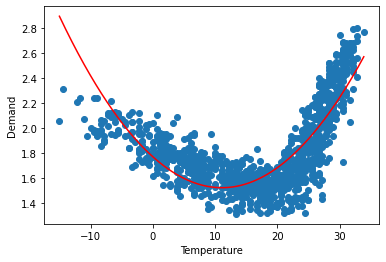

,Value
rmse,1.829105e-01
r2,7.261943e-01
f-statistic,8.847327e+02
p-value,5.054577e-95


In [56]:
results2 = train_and_eval(Xtrain, Xtest, ytrain, ytest, degree=2)
results2

## Third experiment

#### Polynomial degree = 3

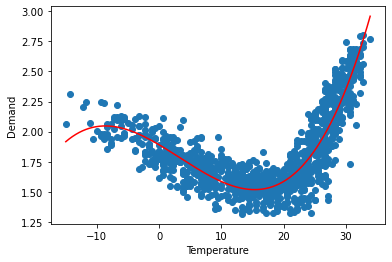

,Value
rmse,1.474768e-01
r2,8.220029e-01
f-statistic,1.510203e+03
p-value,1.334986e-124


In [57]:
results3 = train_and_eval(Xtrain, Xtest, ytrain, ytest, degree=3)
results3

## Fourth experiment
### Polynomial degree = 4

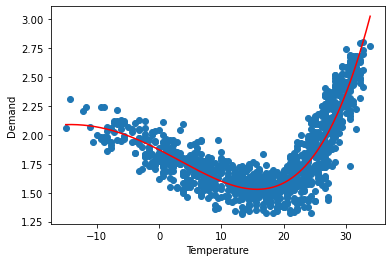

,Value
rmse,1.460612e-01
r2,8.254037e-01
f-statistic,1.546653e+03
p-value,5.365365e-126


In [58]:
results4 = train_and_eval(Xtrain, Xtest, ytrain, ytest, degree=4)
results4

## Compare the performance of the four models

In [22]:
pd.concat([results1, results2, results3, results4], axis=1)

,linear,polynomial d = 2,polynomial d = 3,polynomial d = 4
rmse,1.001591e-01,3.345625e-02,2.174942e-02,2.133387e-02
r2,-5.366169e+00,5.756325e-01,7.843318e-01,7.923317e-01
f-statistic,5.327309e+01,3.848865e+02,5.023183e+02,3.900454e+02
p-value,2.219669e-12,1.110223e-16,1.110223e-16,1.110223e-16


In [62]:
results1 = results1.rename(columns={'Value': 'd=1'})
results2 = results2.rename(columns={'Value': 'd=2'})
results3 = results3.rename(columns={'Value': 'd=3'})
results4 = results4.rename(columns={'Value': 'd=4'})
pd.concat([results1, results2, results3, results4], axis=1)

,d=1,d=2,d=3,d=4
rmse,3.188273e-01,1.829105e-01,1.474768e-01,1.460612e-01
r2,1.680903e-01,7.261943e-01,8.220029e-01,8.254037e-01
f-statistic,7.732269e+01,8.847327e+02,1.510203e+03,1.546653e+03
p-value,8.445803e-17,5.054577e-95,1.334986e-124,5.365365e-126
